<a href="https://colab.research.google.com/github/selsabilmohamed/bank/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
# a) Read data
data = pd.read_csv('housing.csv')


In [ ]:
# b) Find the shape of the data
print("Shape of the data:", data.shape)


Shape of the data: (20640, 10)


In [ ]:
# c) Find the information
print("Information about the data:")
print(data.info())



Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
# d) Find whether the dataset has any missing values
print("Missing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# e) Describe the dataset
print("Description of the dataset:")
print(data.describe())

Description of the dataset:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.49

In [ ]:
# f) Drop ocean proximity column
data = data.drop('ocean_proximity', axis=1)

In [ ]:
# g) Find if there are unique values in the remaining columns
print("Unique values in each column:")
for column in data.columns:
    print(column, ":", data[column].nunique())

Unique values in each column:
longitude : 844
latitude : 862
housing_median_age : 52
total_rooms : 5926
total_bedrooms : 1923
population : 3888
households : 1815
median_income : 12928
median_house_value : 3842


In [ ]:
# h) If any col holds object datatype, transform the data into integer type by implementing label-encoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])


In [ ]:
# i) If you have implemented label encoder test, whether all the cols now have int data types
print("Data types of columns after label encoding:")
print(data.dtypes)


Data types of columns after label encoding:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [ ]:
# j) Scale data with min max scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [ ]:
# l) Implement K-means without elbow method, choose your own cluster numbers and find the cluster center points
kmeans = KMeans(n_clusters=4, random_state=42)


In [ ]:
# Initialize SimpleImputer to help put the mean values instead of leaving the columns NaN
# Whenever I try to do code, I'd rather use the simpleImputer because whenever I leave the NaN, I dont want to delete the whole rows
#I feel like just computing the mean is way better and "smoother" for my code I'm not sure if that makes sense
imputer = SimpleImputer(strategy='mean')


In [ ]:
# Fit the imputer and transform
data_imputed = imputer.fit_transform(data_scaled)


In [ ]:
# Now K-means clustering
kmeans.fit(data_imputed)
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n) Justify: Lower inertia is apparently better for clustering because inertia measures how spread out points are in a cluster. The elbow method finds the most optimal or better cluster by graphing interia compared to number of clusters, so when it decreases slower, that means that the more clusters you have doesn't really add anything.

In [ ]:
# m) Find inertia, labels and accuracy score
inertia = kmeans.inertia_
labels = kmeans.labels_

In [ ]:
# Results for the intertia and labels
print("Inertia:", inertia)
print("Labels:", labels)

Inertia: 2229.2878332953815
Labels: [0 0 0 ... 1 1 1]


In [ ]:
# n) Justify: Lower inertia is apparently better for clustering.

In [ ]:
#Kmeans with Elbow method determines how many optimal clusters we need to divide according to their similar features

# o) Implement elbow method for finding the optimal cluster
inertia_values = []

In [ ]:
# Here I'm trying different numbers of clusters just to check
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_imputed)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

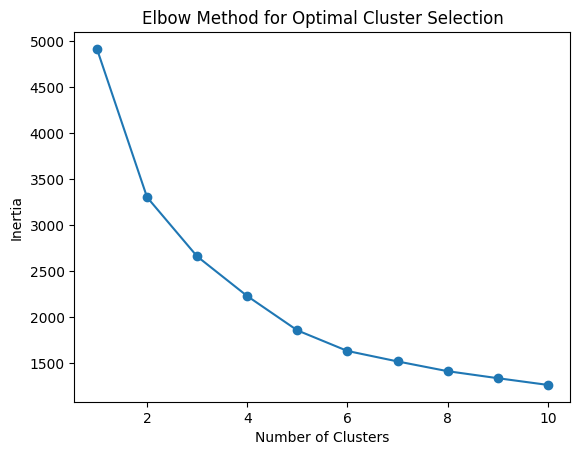

In [ ]:

# Plotting the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.xlabel('Number of Clusters') #X axis
plt.ylabel('Inertia') #Y axis
plt.show()

In [ ]:
#p) Which one is the optimal cluster, justify your answer.
# It looks like from 3 to 4, there seems to be the optimal cluster. That point is likely
#where the interia starts to slow down. It is most likely 4. (Most reasonable choice)